In [1]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import yfinance as yf

# Download historical stock price data for Apple (AAPL)
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
df.reset_index(inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [20]:
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059441,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200
...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142426,69007800
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725296,75703700


In [21]:
import pandas as pd

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
display(df.isnull().sum())

# Fill or drop missing values as appropriate
df = df.dropna()

# Display basic information about the dataset
display(df.info())
display(df.describe())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
 6   Volume     756 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.5 KB


None

,Date,Open,High,Low,Close,Adj Close,Volume
count,756,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,2021-07-01 23:40:57.142856960,130.231998,131.892775,128.614983,130.311812,128.403927,1.120920e+08
min,2020-01-02 00:00:00,57.020000,57.125000,53.152500,56.092499,54.706997,3.519590e+07
25%,2020-09-30 18:00:00,115.924374,117.275000,114.129997,115.739374,113.390213,7.636470e+07
50%,2021-07-01 12:00:00,135.794998,137.200005,133.750000,135.379997,133.814095,9.493580e+07
75%,2022-03-31 06:00:00,150.259998,151.902504,149.029995,150.704998,149.116680,1.296327e+08
max,2022-12-30 00:00:00,182.630005,182.940002,179.119995,182.009995,179.724548,4.265100e+08
std,NaN,30.596429,30.841435,30.287325,30.566496,30.605189,5.602586e+07


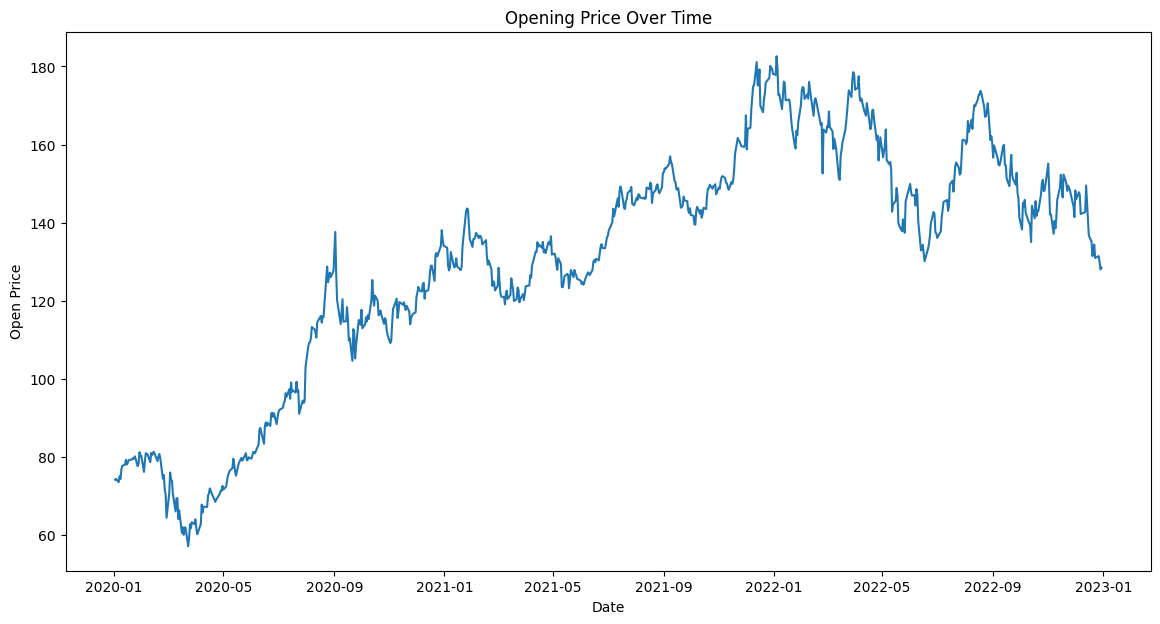

In [26]:
# Set the 'Date' column as the index
# df.set_index('Date', inplace=True)

# Plotting closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Open'])
plt.title('Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()


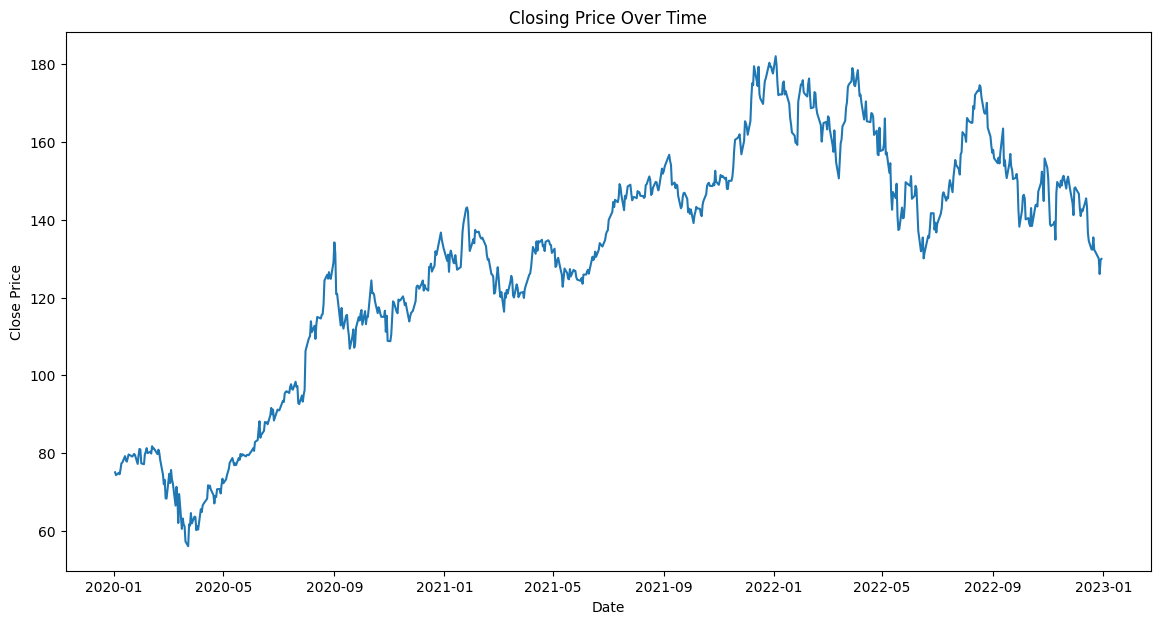

In [24]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()




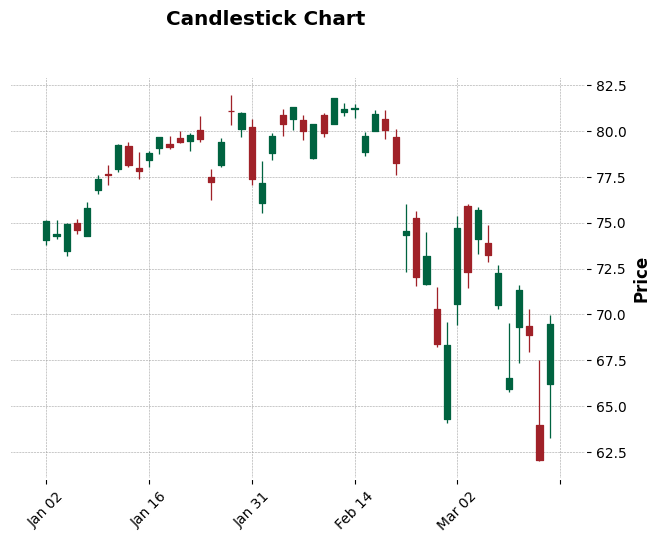

In [40]:
# %pip install mplfinance

import mplfinance as mpf

# Plotting candlestick chart
mpf.plot(df[:50], type='candle', style='charles', title='Candlestick Chart', ylabel='Price')


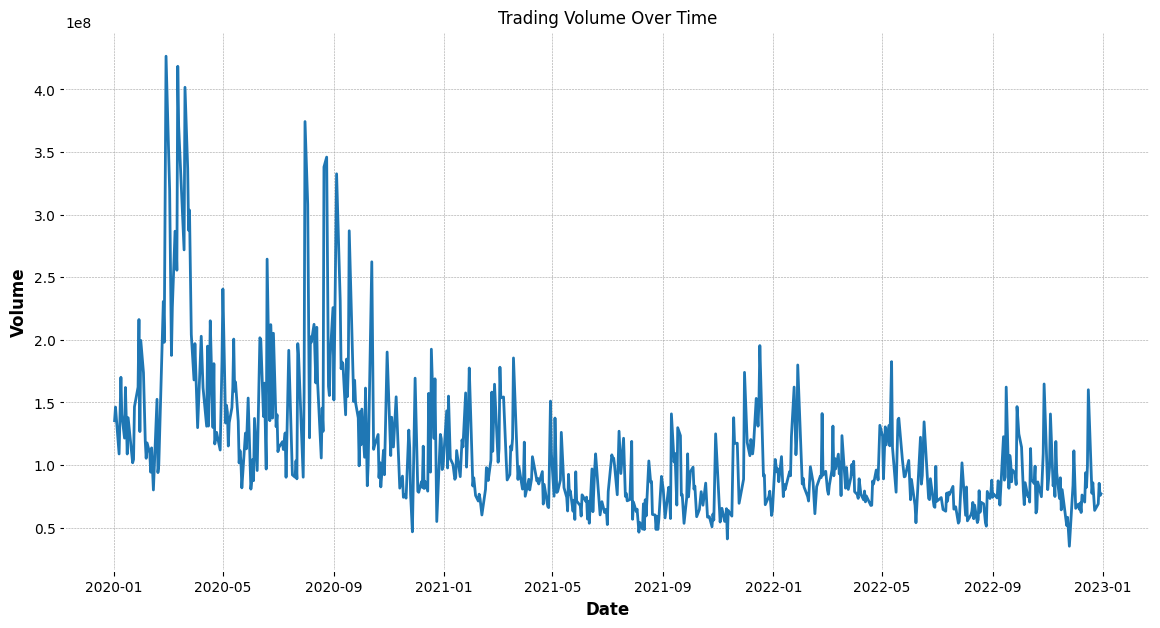

In [41]:
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


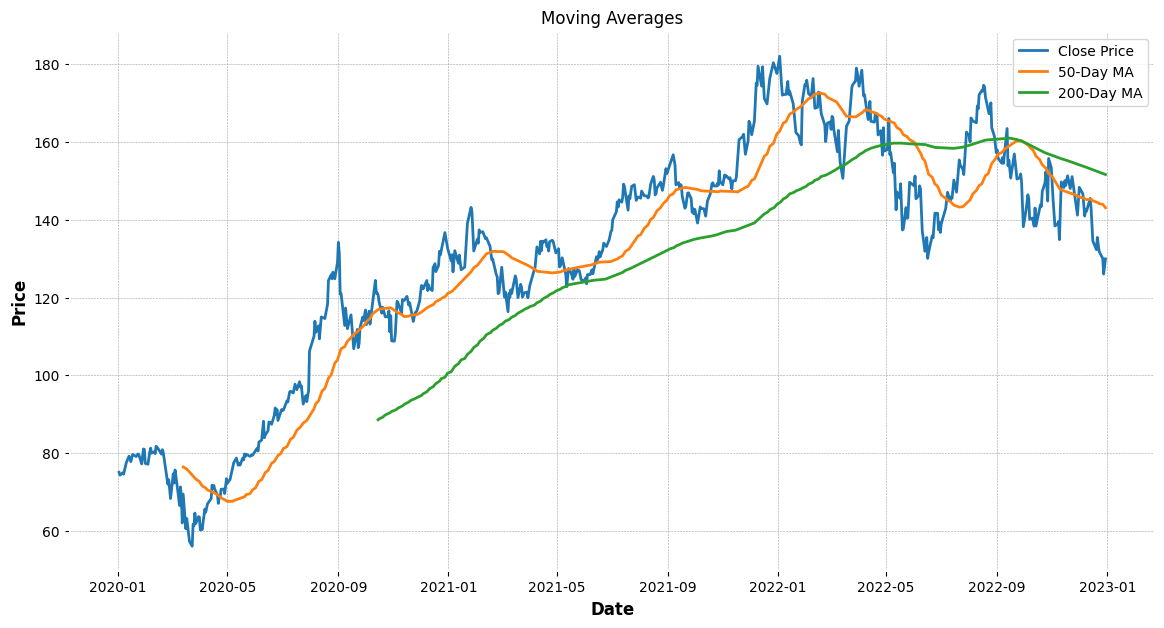

In [42]:
# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


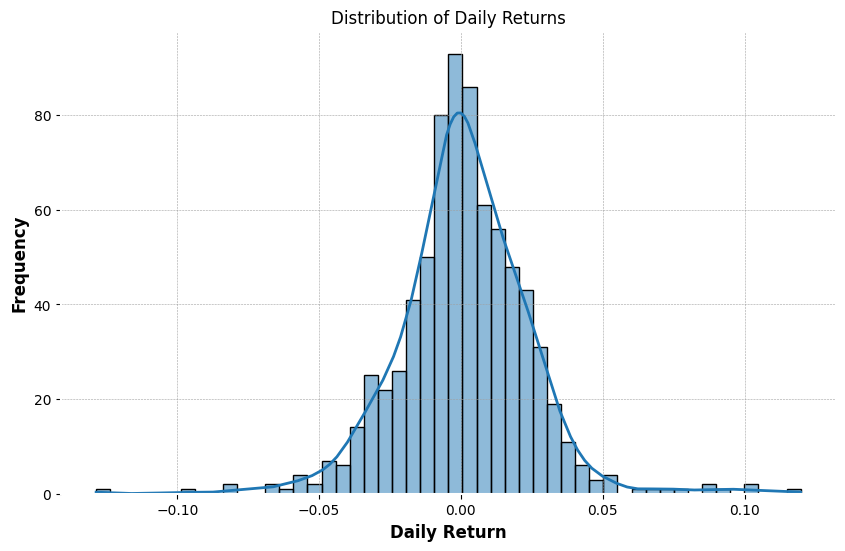

In [43]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


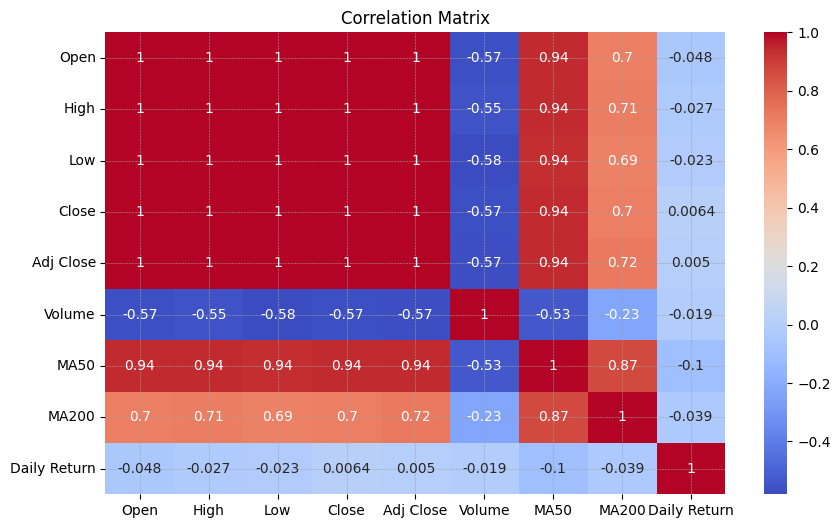

In [44]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


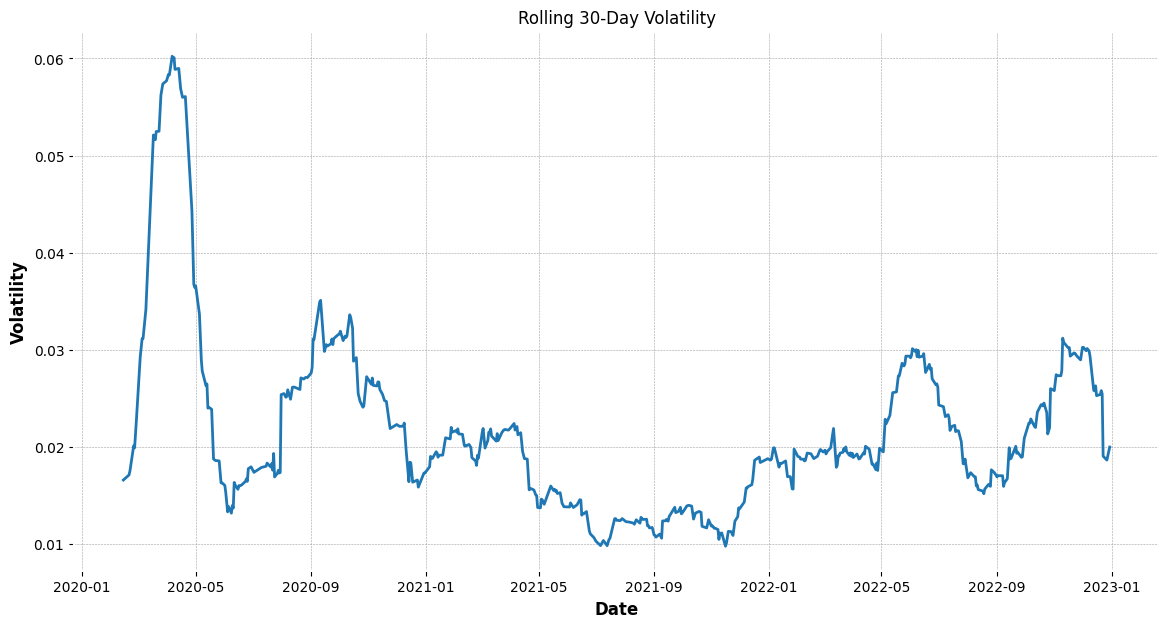

In [45]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['Volatility'])
plt.title('Rolling 30-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


In [4]:
import pandas as pd

# Create additional features
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df

# df.to_csv("out.csv")


,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059441,135480400,NaN,NaN
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800,NaN,NaN
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200,NaN,NaN
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,NaN,NaN
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900,136.839000,140.6610
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142426,69007800,135.392999,139.9515
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400,133.449999,139.1950
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725296,75703700,132.089999,138.2740


In [5]:
df.dropna(inplace=True)
df

# df.to_csv("out2.csv")

,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20
19,2020-01-30,80.135002,81.022499,79.687500,80.967499,78.780602,126743200,79.515751,78.009125
20,2020-01-31,80.232498,80.669998,77.072502,77.377502,75.287582,199588400,79.372501,78.123625
21,2020-02-03,76.074997,78.372498,75.555000,77.165001,75.080803,173788400,79.120751,78.264000
22,2020-02-04,78.827499,79.910004,78.407501,79.712502,77.559509,136616400,79.177751,78.502126
23,2020-02-05,80.879997,81.190002,79.737503,80.362503,78.191948,118826800,79.271501,78.790376
...,...,...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900,136.839000,140.661000
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142426,69007800,135.392999,139.951500
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400,133.449999,139.195000
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725296,75703700,132.089999,138.274000


In [6]:
import pandas as pd

# Create additional features
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df.dropna(inplace=True)

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_20']]
y = df['Close']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_test, y_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 0.7927994453926769
Mean Squared Error: 1.3070183504911093


#### Residual Plot: This plot shows the difference between the predicted values and the actual values.
The residual plot shows the residuals (difference between the actual and predicted values) on the y-axis 
and the predicted values on the x-axis. A well-fitted model will have residuals scattered randomly around
the horizontal axis (0 line).

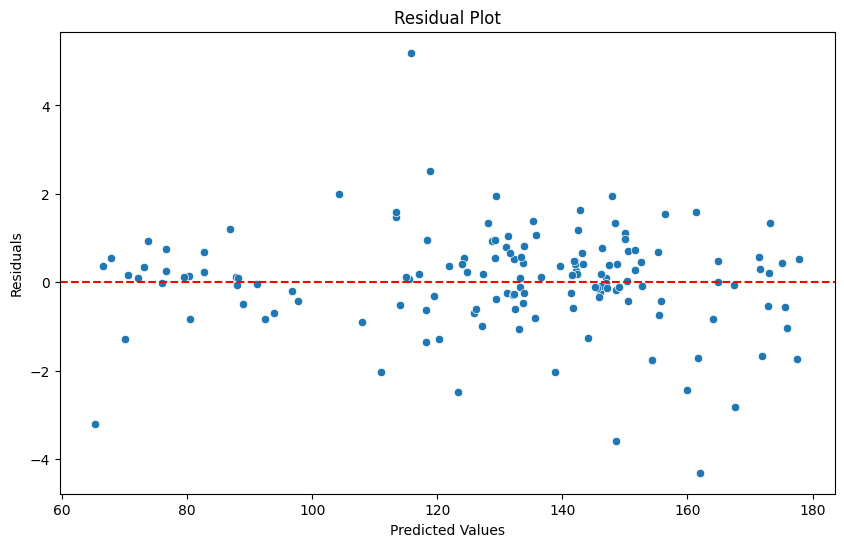

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Prediction vs. Actual Plot: This plot shows how well the predicted values match the actual values.
This plot shows the predicted values on the y-axis and the actual values on the x-axis. Ideally, the points should lie close to the diagonal line indicating perfect predictions.

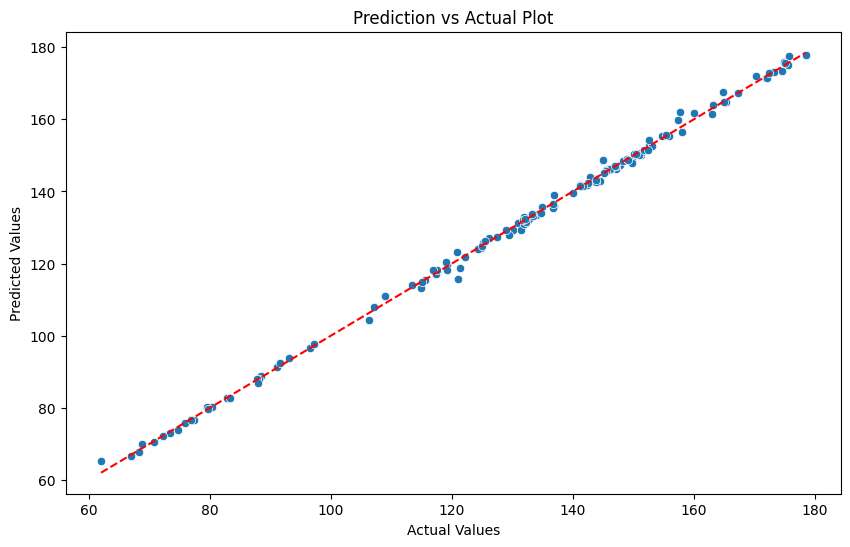

In [17]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot')
plt.show()

### Bar Chart for MAE and MSE: This bar chart shows the values of the MAE and MSE to give a quick comparison.
This bar chart provides a visual comparison of the MAE and MSE values, giving a quick summary of the model's performance.

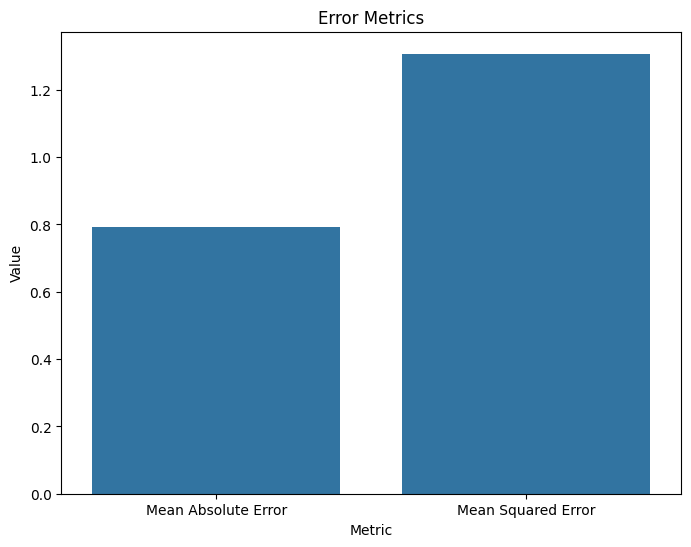

In [18]:
# Bar Chart for MAE and MSE
errors = {'Metric': ['Mean Absolute Error', 'Mean Squared Error'], 'Value': [mae, mse]}
error_df = pd.DataFrame(errors)
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=error_df)
plt.title('Error Metrics')
plt.show()


In [18]:
import joblib

# Save the model
joblib.dump(model, 'stock_price_predictor.pkl')

# Load the model
model = joblib.load('stock_price_predictor.pkl')

# Predict for a new day
new_data = [[114.352501, 116.000000, 114.007500, 105633600, 113.027750, 105.858250]]  # Replace with actual values
predicted_close = model.predict(new_data)
print(f'Predicted Close Price: {predicted_close[0]}')


Predicted Close Price: 115.49476588766152


C:\Users\saad2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
